# <center>Expectation-Maximization</center>

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

## 1. Mixture of 2 Gaussians

### 1.1 Data Generation

Parameters of the Gaussians.

In [20]:
mu = (6, 12) # means
sigma = (2, 1) # standard deviation

Gauss formula.

In [21]:
# guassian of point x with mean m and stddev s
def gauss(x, m, s):
    return np.exp(- (x-m)**2 / (2*s**2)) / s*np.sqrt(2*np.pi)

Plot the Gaussians.

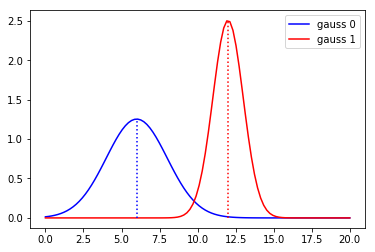

In [22]:
# abscissae space
x = np.linspace(0, 20, 100)

# gauss curves
plt.plot(x, gauss(x, mu[0], sigma[0]), color='blue', label='gauss 0')
plt.plot(x, gauss(x, mu[1], sigma[1]), color='red', label='gauss 1')

# mean vertical line
plt.plot([mu[0], mu[0]], [0, 1/sigma[0]*np.sqrt(2*np.pi)], color='blue', ls=':')
plt.plot([mu[1], mu[1]], [0, 1/sigma[1]*np.sqrt(2*np.pi)], color='red', ls=':')

plt.legend(loc='best')

Generate data points.

In [29]:
# generate n points for each gaussian
n = 10
Z = np.concatenate((np.random.normal(mu[0], sigma[0], n), np.random.normal(mu[1], sigma[1], n)))

Plot data points.

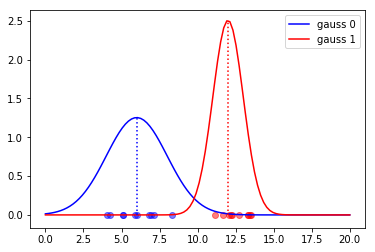

In [30]:
# abscissae space
x = np.linspace(0, 20, 100)

# gauss curves
plt.plot(x, gauss(x, mu[0], sigma[0]), color='blue', label='gauss 0')
plt.plot(x, gauss(x, mu[1], sigma[1]), color='red', label='gauss 1')

# mean vertical line
plt.plot([mu[0], mu[0]], [0, 1/sigma[0]*np.sqrt(2*np.pi)], color='blue', ls=':')
plt.plot([mu[1], mu[1]], [0, 1/sigma[1]*np.sqrt(2*np.pi)], color='red', ls=':')

# data points
plt.scatter(Z[:n], [0]*n, alpha=.5, color='blue')
plt.scatter(Z[n:], [0]*n, alpha=.5, color='red')

plt.legend(loc='best')

### 1.2 EM algorithm

Parameters.

In [31]:
max_iter = 100

Iterations.

Means :  [8.15287672 5.09292809]
Std devs :  [2.54469808 0.99994051]

Means :  [10.855369264959842, 5.3558311445128055]
Std devs :  [2.774476186826737, 0.9910574099449451]


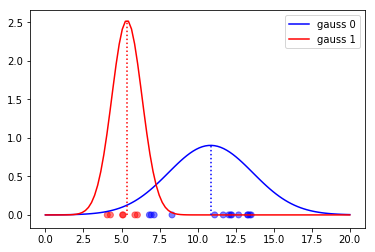

Continue ? Y or N : Y

Means :  [11.568171772220024, 5.566497465897751]
Std devs :  [2.213460236664301, 1.0667639417549617]


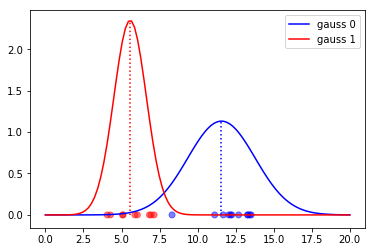

Continue ? Y or N : Y

Means :  [12.022670806335812, 5.707390254167075]
Std devs :  [1.6903219334370152, 1.1273472693289563]


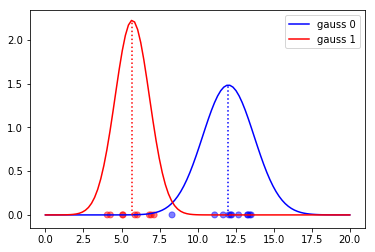

Continue ? Y or N : Y

Means :  [12.336938991465487, 5.846731416559916]
Std devs :  [1.2179947661553625, 1.2109858052372722]


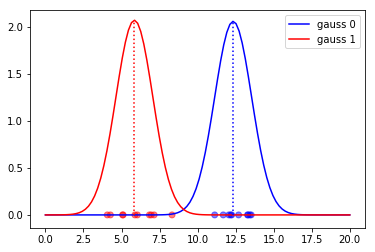

Continue ? Y or N : Y

Means :  [12.537875312091847, 5.960702022568871]
Std devs :  [0.8198063211595941, 1.2873719660044516]


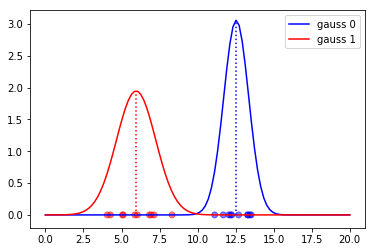

Continue ? Y or N : Y

Means :  [12.552391653801713, 5.96913443396054]
Std devs :  [0.7829987337074674, 1.293288434839419]


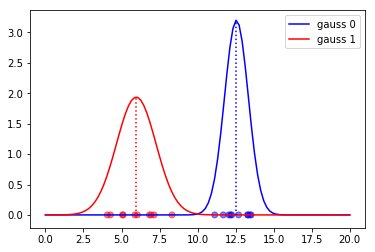

Continue ? Y or N : Y

Means :  [12.552430211546701, 5.969262333973367]
Std devs :  [0.7829652665440182, 1.2935257208917783]


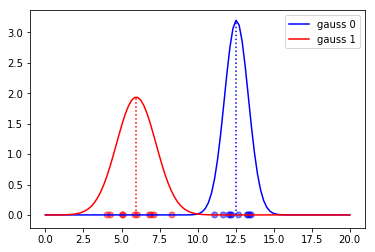

Continue ? Y or N : Y

Means :  [12.5524307820988, 5.969264498214817]
Std devs :  [0.7829649124183546, 1.2935298207057397]


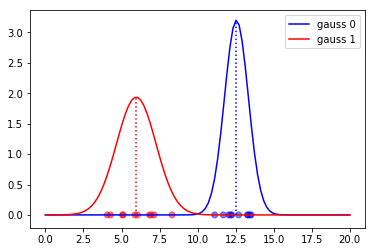

Continue ? Y or N : Y

Means :  [12.552430791785117, 5.969264535032047]
Std devs :  [0.7829649064377887, 1.2935298904749413]


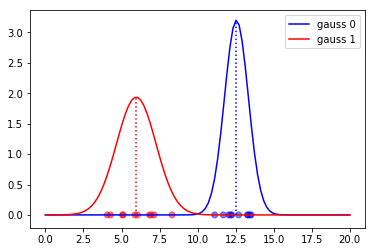

Continue ? Y or N : N


In [33]:
# initialization: random means and std dev
mu_ = np.random.uniform(0,10,2)
sigma_ = np.random.uniform(0,5,2)
print("Means : ", mu_)
print("Std devs : ", sigma_)

# iterations
for k in range(max_iter):
    
    # list of probabilities for cluster 0 and 1 for each point
    proba_0 = list()
    proba_1 = list()
    
    # points colors for scatter plot
    color = list()
    
    # compute most probable cluster for each point (and color for scatter plot)
    for z in Z:
        denominator = gauss(z, mu_[0], sigma_[0]) + gauss(z, mu_[1], sigma_[1])
        proba_0.append(gauss(z, mu_[0], sigma_[0]) / denominator)
        proba_1.append(gauss(z, mu_[1], sigma_[1]) / denominator)
        if proba_0[-1] > proba_1[-1]:
            color.append('blue')
        else:
            color.append('red')
    
    # compute new mean and std for each gaussian based on assignments
    mu_ = [0,0]
    sigma_ = [0,0]
    # mean
    for i,z in enumerate(Z):
        mu_[0] += z*proba_0[i]
        mu_[1] += z*proba_1[i]
    mu_[0] /= sum(proba_0)
    mu_[1] /= sum(proba_1)
    # std
    for i,z in enumerate(Z):
        sigma_[0] += proba_0[i] * (z-mu_[0])**2
        sigma_[1] += proba_1[i] * (z-mu_[1])**2
    sigma_[0] = np.sqrt(sigma_[0] / sum(proba_0))
    sigma_[1] = np.sqrt(sigma_[1] / sum(proba_1))
    
    # print estimated values
    print()
    print("Means : ", mu_)
    print("Std devs : ", sigma_)
    
    # plot
    x = np.linspace(0, 20, 100)
    plt.plot(x, gauss(x, mu_[0], sigma_[0]), color='blue', label='gauss 0')
    plt.plot(x, gauss(x, mu_[1], sigma_[1]), color='red', label='gauss 1')
    plt.plot([mu_[0], mu_[0]], [0, 1/sigma_[0]*np.sqrt(2*np.pi)], color='blue', ls=':')
    plt.plot([mu_[1], mu_[1]], [0, 1/sigma_[1]*np.sqrt(2*np.pi)], color='red', ls=':')
    plt.scatter(Z[:n], [0]*n, alpha=.5, color=color[:n])
    plt.scatter(Z[n:], [0]*n, alpha=.5, color=color[n:])
    plt.legend(loc='best')
    plt.show()
    plt.close()
    
    # aks if continue
    continu = input("Continue ? Y or N : ")
    while continu not in {'Y', 'N'}:
            continu = input("Continue ? Y or N : ")
    if continu == 'Y':
        continue
    else:
        break